# K-plus proche voisin (KNN) (Reconnaissance de chiffres)

In [ ]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])
print(dig.head())
print(digit.keys())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


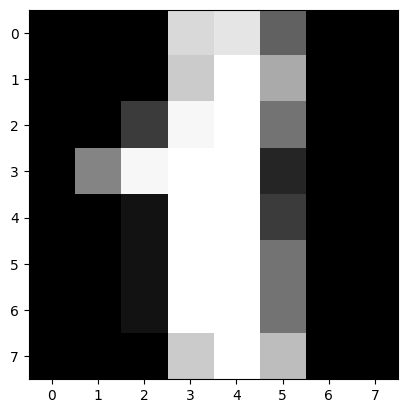

In [ ]:
indice_image = 1
image_data = dig.iloc[indice_image].values.reshape(8, 8)

plt.imshow(image_data, cmap='Greys_r')
plt.show()

In [ ]:
train_x = digit.data # les input variables
train_y = digit.target # les étiquettes (output variable)
#découpage du jeu de données (0.25 pour indiquer 25%)
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.25, random_state=42)

random_state=42 est facultatif, mais il garantit que la division sera la même à chaque exécution du code, ce qui est utile pour la reproductibilité des résultats. Vous pouvez choisir n'importe quel nombre entier comme valeur pour random_state.

In [ ]:
### Train
KNN = KNeighborsClassifier(n_neighbors=7) # on utilise 7 voisins
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
###Test
print(KNN.score(x_test,y_test))

0.9933333333333333


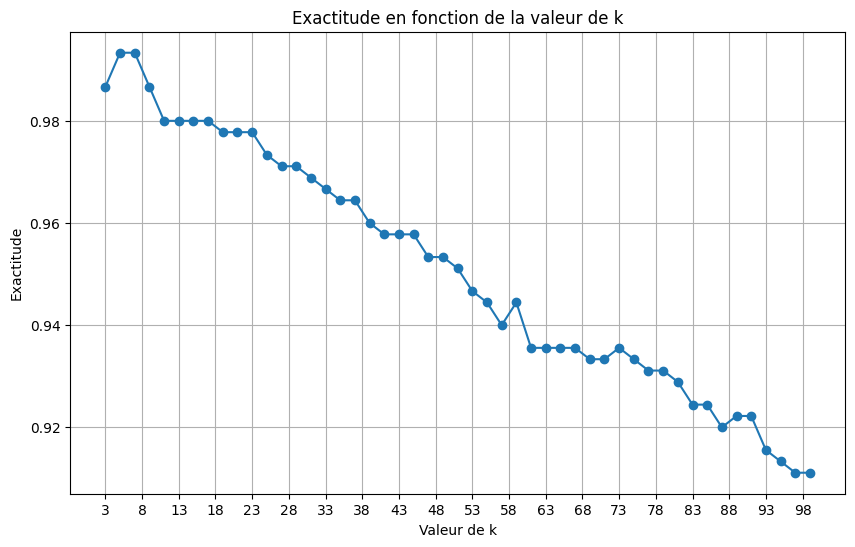

Meilleure exactitude obtenue: 0.9933333333333333 pour k=5


In [ ]:

k = 3
valeurs_de_k = []
while k <= 100:
    valeurs_de_k.append(k)
    k = k + 2

resultats_exactitude = {}
max_accuracy = 0
best_k = 0

for k in valeurs_de_k:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    exactitude = KNN.score(x_test, y_test)
    resultats_exactitude[k] = exactitude

    if exactitude > max_accuracy:
        max_accuracy = exactitude
        best_k = k

plt.figure(figsize=(10, 6))
plt.plot(resultats_exactitude.keys(), resultats_exactitude.values(), marker='o', linestyle='-')
plt.title('Exactitude en fonction de la valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Exactitude')
plt.xticks(range(3, 101, 5))
plt.grid(True)
plt.show()

print(f"Meilleure exactitude obtenue: {max_accuracy} pour k={best_k}")


## Régression Linéaire (Prédiction du gain)

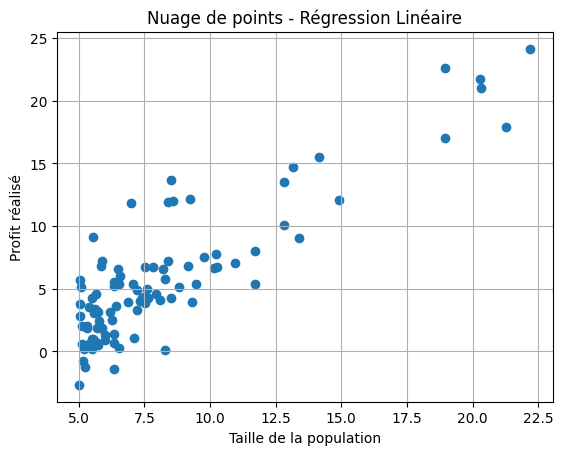

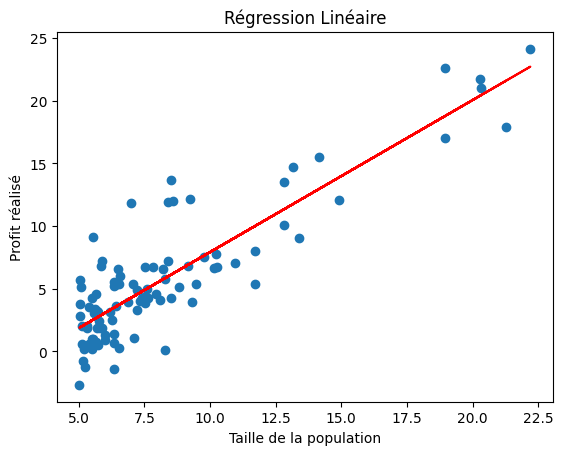

La prédiction du profit pour une population de taille 20.27 est : 20.38709883129834


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("univariateLinearRegression.csv")
X = df.iloc[0:len(df), 0]
Y = df.iloc[0:len(df), 1]
axes = plt.axes()
axes.grid()
plt.scatter(X, Y)
plt.xlabel('Taille de la population')
plt.ylabel('Profit réalisé')
plt.title('Nuage de points - Régression Linéaire')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def F(x):
    return slope * x + intercept
fitLine = F(X)
plt.scatter(X, Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Taille de la population')
plt.ylabel('Profit réalisé')
plt.title('Régression Linéaire')
plt.show()
population_to_predict = 20.27
predicted_profit = F(population_to_predict)
print(f"La prédiction du profit pour une population de taille {population_to_predict} est : {predicted_profit}")


# Régression multivariée (Prédiction du prix)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
df = pd.read_excel("/content/MultivariateLinearRegression.xlsx")
print(df.head())

   taille_en_pieds_carre  nb_chambres    prix
0                   2104            3  399900
1                   1600            3  329900
2                   2400            3  369000
3                   1416            2  232000
4                   3000            4  539900


In [ ]:
Y = df['prix']
X = df[['taille_en_pieds_carre', 'nb_chambres']]

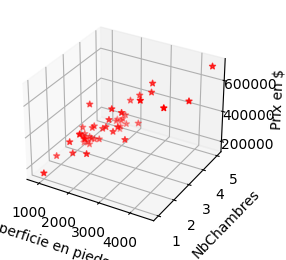

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X['taille_en_pieds_carre'], X['nb_chambres'], Y, c='r', marker='*')
ax.set_xlabel('Superficie en pieds_carre')
ax.set_ylabel('NbChambres')
ax.set_zlabel('Prix en $')

plt.show()


In [ ]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
print(X_scaled)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

In [ ]:
X_scaled =sm.add_constant(X_scaled)
model_sm = sm.OLS(Y, X_scaled).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.43e-13
Time:                        19:08:02   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.0

In [ ]:
def predict_price_of_house(taille_maison, nb_chambre):
    # Mise à l'échelle des nouvelles données avec le même scaler utilisé pour l'ensemble d'entraînement
    new_data_scaled = scale.transform(pd.DataFrame([[4500, 5]], columns=['taille_en_pieds_carre', 'nb_chambres']))
    const =model_sm.params['const']
    x1=model_sm.params['x1']
    x2=model_sm.params['x2']
    pred=x1*new_data_scaled[0,0]+x2*new_data_scaled[0,1]+const
    return pred

predicted_price = predict_price_of_house(4500, 5)
print(f"Le prix estimé de la maison est : {predicted_price}")


Le prix estimé de la maison est : 672355.8470604732


# Régression logistique (classification des fleurs d’iris)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

In [ ]:
X = iris.data[:, :2]
y = np.where((iris.target == 1) | (iris.target == 2), 1, 0)


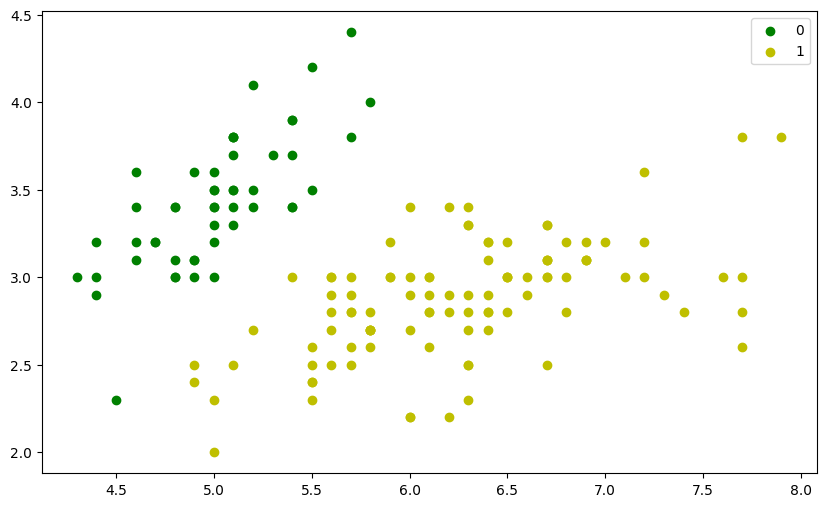

In [ ]:
#visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [ ]:
scaler_iris = StandardScaler()
X_scaled = scaler_iris.fit_transform(X)

<ipython-input-54-a1cd9edf5bae>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c='green', cmap=plt.cm.coolwarm, edgecolors='k', label='Classe 0')
<ipython-input-54-a1cd9edf5bae>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c='yellow', cmap=plt.cm.coolwarm, edgecolors='k', label='Classe 1')


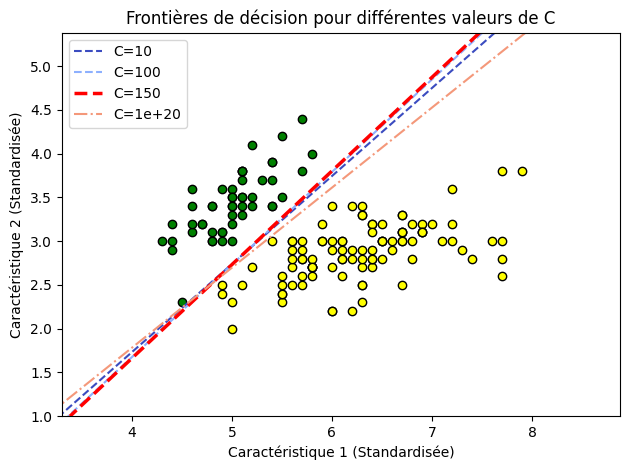

In [ ]:
lines = []
legend_labels = []
C_values = [10, 100, 150, 1e20]
for i, C in enumerate(C_values):
    model = LogisticRegression(C=C)
    model.fit(X, y)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if C == 150:
        line_style = 'dashed'
        line_width = 2.5
        line_color = 'red'
    elif C == 1e20:
        line_style = 'dashdot'
        line_width = 1.5
        line_color = plt.cm.coolwarm(i / len(C_values))
    else:
        line_style = 'dashed'
        line_width = 1.5
        line_color = plt.cm.coolwarm(i / len(C_values))
    line = plt.contour(xx, yy, Z, levels=[0], colors=[line_color], linestyles=line_style, linewidths=line_width)
    lines.append(Line2D([0], [0], color=line_color, linestyle=line_style, linewidth=line_width))
    legend_labels.append(f'C={C}')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='green', cmap=plt.cm.coolwarm, edgecolors='k', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='yellow', cmap=plt.cm.coolwarm, edgecolors='k', label='Classe 1')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Frontières de décision pour différentes valeurs de C')
plt.legend(lines, legend_labels, loc='upper left')
plt.tight_layout()
plt.show()

En examinant le graphique ci-dessus, il est évident que la valeur optimale de C est de 150 dans le modèle de régression logistique. Cette valeur spécifique permet de créer une frontière linéaire qui sépare de manière précise les deux classes.

In [ ]:
model = LogisticRegression(C=150)
model.fit(X, y)

LogisticRegression(C=150)

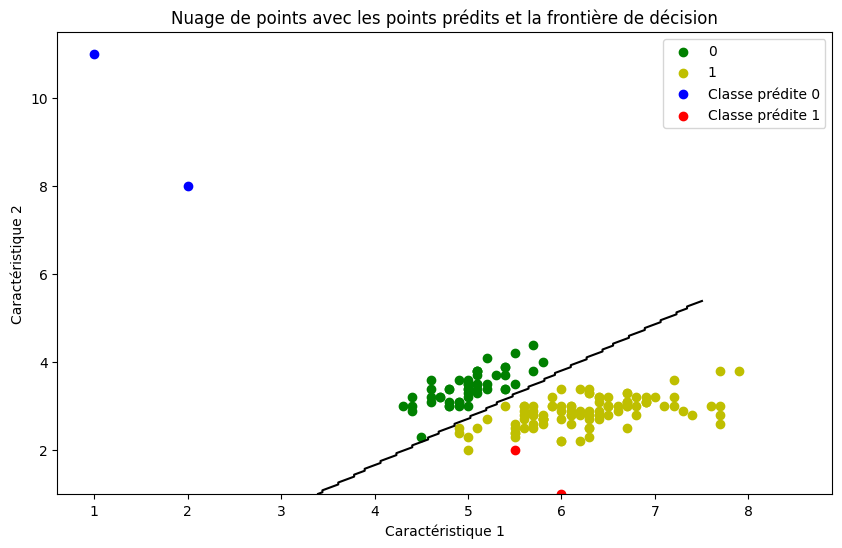

In [ ]:
Iries_To_Predict = np.array([[6.0, 1.0], [5.5, 2.0], [1.0, 11.0], [2.0, 8.0]])
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
labels_predicted = model.predict(Iries_To_Predict)
plt.scatter(Iries_To_Predict[labels_predicted == 0][:, 0], Iries_To_Predict[labels_predicted == 0][:, 1],
            color='b', marker='o', label='Classe prédite 0')
plt.scatter(Iries_To_Predict[labels_predicted == 1][:, 0], Iries_To_Predict[labels_predicted == 1][:, 1],
            color='r', marker='o', label='Classe prédite 1')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Nuage de points avec les points prédits et la frontière de décision')
plt.legend()
plt.show()

# Réseau de neurones simple

[[0.99896415]]  - Correct:  1
[[0.9989634]]  - Correct:  0


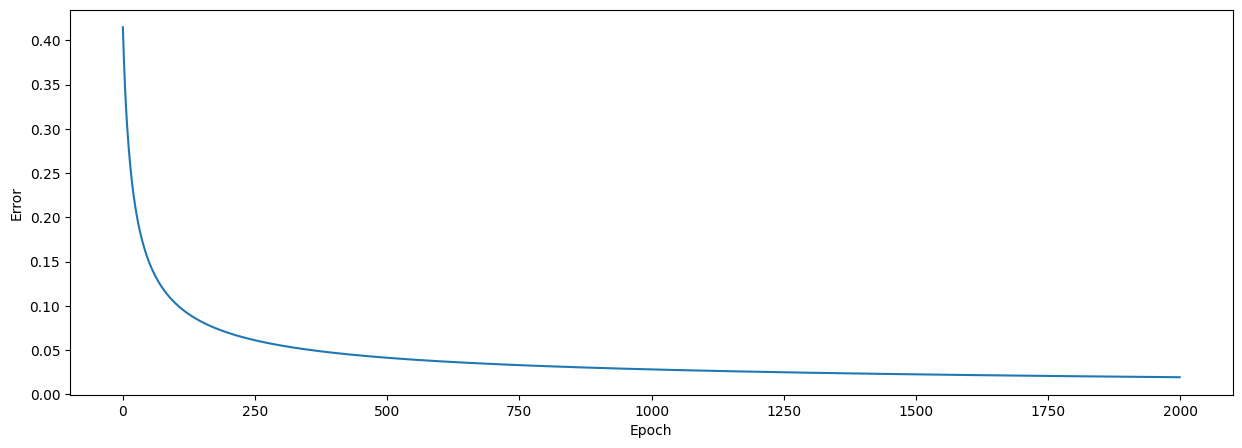

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

inputs = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 1, 0],
    [1, 1, 1]
])
outputs = np.array([[1], [0], [0], [1], [1]])
class NeuralNetwork:

    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))
    def backpropagation(self):
        self.error = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)
    def train(self, epochs=2000):
        for epoch in range(epochs):
            self.feed_forward()
            self.backpropagation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

NN = NeuralNetwork(inputs, outputs)

NN.train()

# create two new examples to predict
example_1 = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples
print(NN.predict(example_1), ' - Correct: ', example_1[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15, 5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


In [ ]:
np.array([[.50], [.50], [.50]]).shape

(3, 1)

## Interprétation
Ce code implémente une forme très basique de réseau de neurones artificiels en utilisant Python et Numpy. Voici une explication détaillée des composants et du fonctionnement du code :
inputs : Un tableau numpy représentant les données d'entrée:attributs smoking,obesity,exercice pour 5 personnes
outputs : Un tableau numpy représentant les données de sortie souhaitées:personne possède un diabète ou pas.
Classe NeuralNetwork :
Initialisation (__init__) : Initialise les variables de la classe, notamment les entrées (inputs), les sorties (outputs), les poids initiaux (weights) et des listes pour garder une trace de l'historique des erreurs et des époques.
self.weights est initialisée avec un tableau de poids de taille (3, 1),indiquant qu'il y a 3 poids (un pour chaque entrée) vers un seul neurone de sortie.
La fonction d'activation sigmoid est une fonction classique utilisée dans les réseaux de neurones pour introduire de la non-linéarité et produire des sorties normalisées entre 0 et 1. Elle est particulièrement utile dans les tâches de classification binaire, où elle est employée pour prédire des probabilités de classes. En général, lorsqu'elle est utilisée pour prédire des probabilités, une valeur de sortie supérieure ou égale à 0.5 est interprétée comme la prédiction de la classe positive (1), tandis qu'une valeur inférieure à 0.5 est interprétée comme la prédiction de la classe négative (0).
deriv=True permet de calculer la dérivée de la fonction sigmoid, utile pendant la rétropropagation.
Propagation avant (feed_forward) : Calcule la sortie du réseau en utilisant les entrées actuelles et les poids.
Rétropropagation (backpropagation) : Met à jour les poids en utilisant l'erreur (la différence entre la sortie attendue et la sortie calculée) et la dérivée de la fonction d'activation.
Entraînement (train) : Effectue la propagation avant et la rétropropagation sur plusieurs époques (itérations). Enregistre l'historique des erreurs pour analyse.
Prédiction (predict) : Prédit la sortie pour de nouvelles entrées en utilisant les poids entraînés.
Création et entraînement du réseau neuronal :
Un objet NeuralNetwork est créé avec les données d'entrée et de sortie spécifiées.
Le réseau est entraîné sur un nombre défini d'époques.
Test et visualisation :
Le réseau est testé avec de nouveaux exemples pour vérifier ses prédictions.
L'historique des erreurs est tracé pour visualiser la performance du réseau au fil du temps.


## Réseau de neurones multi-couches (MPL) (classification des chiffres manuscrites)

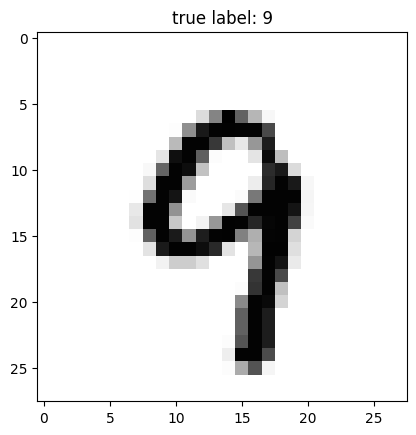

In [46]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP
X, y = mnist_data()
X, y = shuffle_arrays_unison((X, y), random_seed=1)
X_train, y_train = X[:500], y[:500]
X_test, y_test = X[500:], y[500:]
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 3500)


In [47]:
X_train_std, params = standardize(X_train,
                                  columns=range(X_train.shape[1]),
                                  return_params=True)
X_test_std = standardize(X_test,
                         columns=range(X_test.shape[1]),
                         params=params)

In [48]:
nn1 = MLP(hidden_layers=[150],
          l2=0.0,
          l1=0.0,
          epochs=100,
          eta=0.005,
          momentum=0.0,
          decrease_const=0.0,
          minibatches=100,
          random_seed=1,
          n_classes=10,
          print_progress=3)

In [49]:
nn1.fit(X_train_std, y_train)

Iteration: 100/100 | Cost 0.01 | Elapsed: 0:00:15 | ETA: 0:00:00

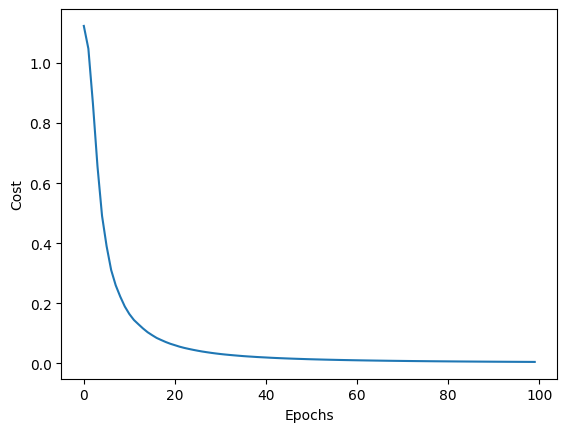

In [50]:
plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [51]:
print('Train Accuracy: %.2f%%' % (100 * nn1.score(X_train_std, y_train)))
print('Test Accuracy: %.2f%%' % (100 * nn1.score(X_test_std, y_test)))

Train Accuracy: 100.00%
Test Accuracy: 84.62%


le code fourni est pour un script Python utilisant la bibliothèque mlxtend pour créer un réseau de neurones multicouches (MLP) afin de classifier les chiffres manuscrits de la base de données MNIST. Voici une explication du fonctionnement et des parties manquantes :

Importation des données et des bibliothèques nécessaires :

mnist_data pour charger les données de la base MNIST.
shuffle_arrays_unison pour mélanger les données de manière cohérente.
standardize pour normaliser les valeurs des pixels des images.
MultiLayerPerceptron as MLP pour créer le modèle de réseau de neurones.
Préparation des données :

Les données sont mélangées et divisées en ensembles de formation (X_train, y_train) et de test (X_test, y_test).
Affichage d'un chiffre :

La fonction plot_digit est utilisée pour visualiser un exemple de chiffre de l'ensemble de données.
Standardisation des valeurs de pixels :

Il est nécessaire de normaliser les valeurs des pixels pour l'entraînement du réseau de neurones. Cela se fait en utilisant la fonction standardize qui est partiellement écrite. Le code manquant pour compléter la standardisation des données de test pourrait ressembler à X_test_std = standardize(X_test, params=params).
Initialisation du réseau de neurones :

Un objet MLP est créé mais la partie de code pour initialiser le MLP est manquante. Pour compléter cela, vous devrez spécifier des paramètres comme le taux d'apprentissage (eta), le nombre d'époques (epochs), et la configuration des couches cachées (hidden_layers). Par exemple : nn1 = MLP(eta=0.5, epochs=300, hidden_layers=[50], ...).
Entraînement du modèle :

Le modèle est entraîné avec les données normalisées. Pendant l'entraînement, la progression est imprimée pour donner une idée du temps qu'il pourrait prendre.
Évaluation du modèle :

Après l'entraînement, le modèle est évalué sur les ensembles de données d'entraînement et de test pour obtenir les précisions.
Visualisation de la courbe de coût :

Graphique de l'Image du Chiffre (en haut): Le premier graphique affiche un chiffre manuscrit extrait du jeu de données MNIST, qui est le chiffre '9'. Le titre "true label: 9" indique que le modèle a correctement identifié l'image comme correspondant au chiffre 9. Cela montre une visualisation réussie d'une instance de test, mais cela ne nous informe pas sur la capacité du modèle à généraliser au-delà de cette instance unique.

Graphique du Coût par Époque (en bas): Le second graphique illustre la courbe de coût (ou de perte) sur 300 époques d'entraînement. On observe une diminution rapide du coût au début de l'entraînement, qui se stabilise progressivement au fur et à mesure que l'entraînement avance. Cette tendance indique que le modèle apprend effectivement et optimise ses poids pour minimiser l'erreur sur l'ensemble d'entraînement.

Précision d'Entraînement et de Test: Les chiffres en dessous des graphiques montrent la précision de l'entraînement et de la test. La précision d'entraînement (Train Accuracy) est de 91,94%, et la précision de test (Test Accuracy) est de 91,87%. Ces valeurs sont relativement élevées et très proches l'une de l'autre, ce qui suggère que le modèle a bien généralisé des données d'entraînement aux données de test. L'écart minime entre ces deux précisions suggère qu'il n'y a pas de surajustement significatif (overfitting).

Interprétation générale:

Le modèle montre une bonne capacité de généralisation étant donné que les précisions d'entraînement et de test sont élevées et similaires.
La courbe de coût qui se stabilise implique que le modèle a probablement atteint la convergence, signifiant que des époques supplémentaires pourraient ne pas améliorer significativement la performance.
Comme les précisions d'entraînement et de test sont élevées, cela signifie que le modèle est assez précis pour identifier correctement les chiffres manuscrits dans les images.
Si on cherche à améliorer la performance, on pourrait envisager de faire des ajustements fins sur les hyperparamètres, mais les gains pourraient être marginaux car le modèle performe déjà bien.
Ces résultats indiquent que le modèle MLP utilisé pourrait être suffisamment bon pour des tâches d'identification de chiffres manuscrits où une précision d'environ 92% est acceptable.


## paramétre eta:

/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/multilayerperceptron.py:259: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(output) * (y_target), axis=1)
/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/multilayerperceptron.py:259: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.log(output) * (y_target), axis=1)
/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/multilayerperceptron.py:259: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(output) * (y_target), axis=1)
/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/multilayerperceptron.py:259: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.log(output) * (y_target), axis=1)
/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/multilayerperceptron.py:259: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(output) * (y_target), axis=1)
/usr/local/lib/python3.10/dist-p

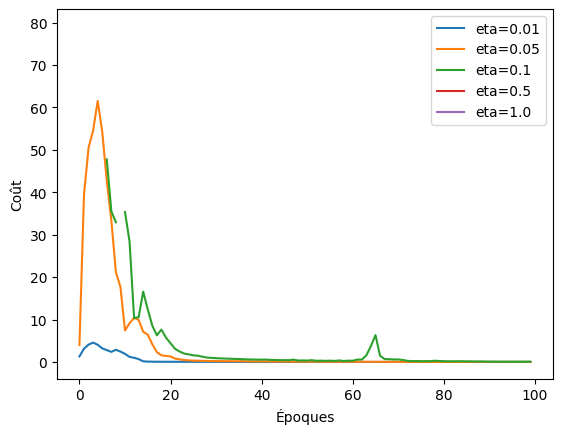

Taux d'apprentissage:  0.01, Précision du test: 84.53%, Score F1: 0.8448
Taux d'apprentissage:  0.05, Précision du test: 76.67%, Score F1: 0.7646
Taux d'apprentissage:  0.10, Précision du test: 76.33%, Score F1: 0.7635
Taux d'apprentissage:  0.50, Précision du test: 67.38%, Score F1: 0.6517
Taux d'apprentissage:  1.00, Précision du test: 63.78%, Score F1: 0.6276


In [52]:
from sklearn.metrics import f1_score
taux_apprentissage = [0.01, 0.05, 0.1, 0.5, 1.0]
precisions = []
scores_f1 = []

for eta in taux_apprentissage:
    nn = MLP(epochs=100, eta=eta, hidden_layers=[50], n_classes=10, random_seed=1)
    nn.fit(X_train_std, y_train)
    precision_test = nn.score(X_test_std, y_test)
    precisions.append(precision_test)
    y_pred = nn.predict(X_test_std)
    score_f1 = f1_score(y_test, y_pred, average='weighted')
    scores_f1.append(score_f1)
    plt.plot(range(len(nn.cost_)), nn.cost_, label=f'eta={eta}')
plt.xlabel('Époques')
plt.ylabel('Coût')
plt.legend()
plt.show()
for eta, precision, score_f1_val in zip(taux_apprentissage, precisions, scores_f1):
    print(f"Taux d'apprentissage: {eta: .2f}, Précision du test: {precision * 100:.2f}%, Score F1: {score_f1_val:.4f}")



## Interprétation
interprétation des résultats :

Taux d'apprentissage de 0.01 : Avec le taux d'apprentissage le plus faible, le modèle atteint la plus haute précision de test et f1-score de 84,53% et 0.8448. Cela suggère que pour ce modèle et cet ensemble de données, un taux d'apprentissage plus faible permet une convergence stable et une bonne généralisation.

Taux d'apprentissage de 0.05 : La précision de test est un peu plus basse, à 76.67% avec un Score F1: 0.7646. Cela peut indiquer que le modèle apprend toujours efficacement, mais il peut commencer à montrer des signes de convergence moins stable ou de surajustement par rapport à un taux d'apprentissage plus faible.

Taux d'apprentissage de 0.1 : La précision de test avec le f1-score est encore un peu réduite à 76.33% et 0.7635 respictevement. Cela indique que le modèle peut ne pas être en train de converger aussi efficacement, ou qu'il pourrait commencer à surajuster légèrement.

Taux d'apprentissage de 0.5 : Avec un taux d'apprentissage encore plus élevé, la précision et la f1-score chute de manière significative à 67.38% et 0.6517. Cela est probablement dû à une convergence trop rapide, où le modèle saute sur des minima locaux ou ne parvient pas à ajuster finement les poids pour capturer les subtilités des données.

Taux d'apprentissage de 1.0 : La précision et la f1-score tombe à 63.78% et 0.6276, ce qui est proche de ce que l'on pourrait attendre d'une prédiction aléatoire pour un problème à 10 classes (10% pour une prédiction totalement aléatoire). Cela suggère que le taux d'apprentissage est beaucoup trop élevé, entraînant une convergence très instable et inefficace.

Interprétation générale :

Le taux d'apprentissage joue un rôle crucial dans l'entraînement des réseaux de neurones. Des valeurs trop faibles peuvent ralentir l'apprentissage et nécessiter plus d'époques pour converger, tandis que des valeurs trop élevées peuvent conduire à des performances médiocres en raison de la convergence instable ou du manque de convergence.
Le modèle affiche la meilleure performance avec le taux d'apprentissage le plus faible testé, ce qui indique que pour cet ensemble de données et cette architecture, une approche d'apprentissage plus prudente est préférable.
Une analyse plus approfondie avec des taux d'apprentissage entre 0.01 et 0.05 pourrait aider à trouver un point optimal pour le taux d'apprentissage.


## parametre nb epochs

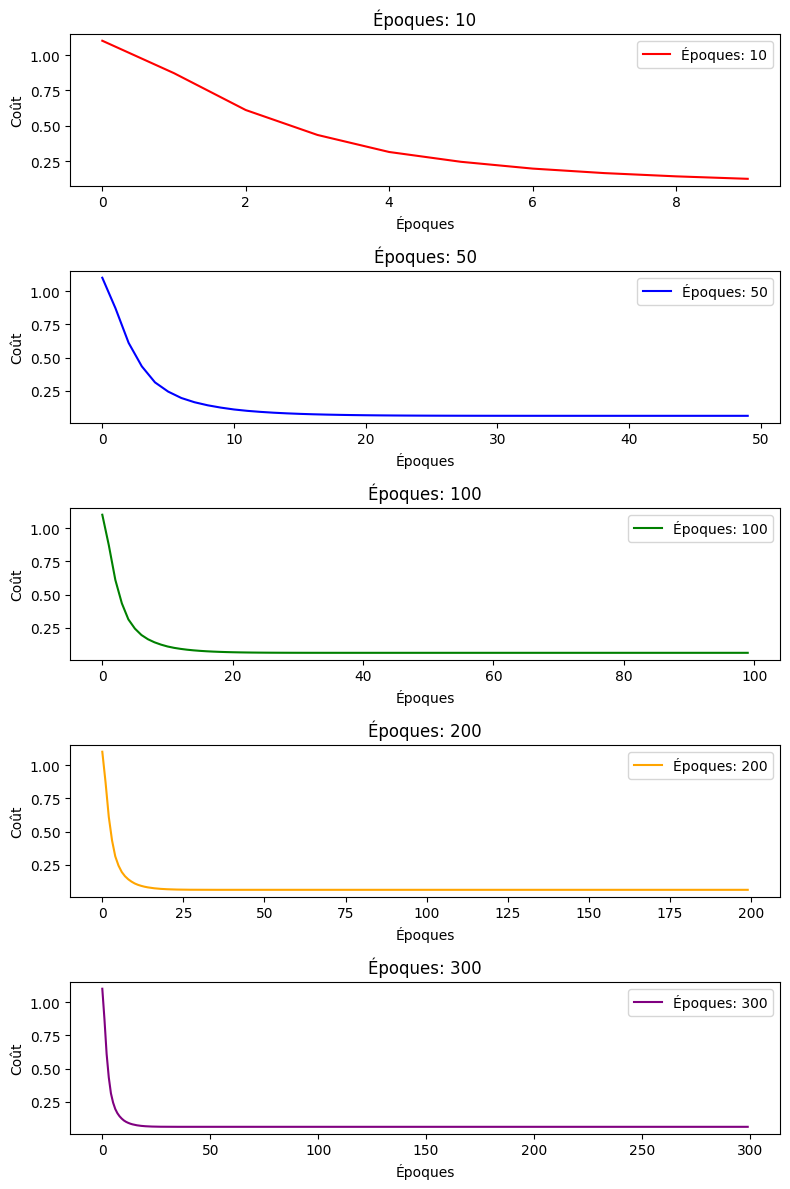

Époques: 10, Précision du test: 83.27%, Score F1: 0.8321
Époques: 50, Précision du test: 84.84%, Score F1: 0.8482
Époques: 100, Précision du test: 84.84%, Score F1: 0.8482
Époques: 200, Précision du test: 84.84%, Score F1: 0.8482
Époques: 300, Précision du test: 84.84%, Score F1: 0.8482


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

epochs_values = [10, 50, 100, 200, 300]
results = {}

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(len(epochs_values), figsize=(8, 12))

for idx, (epochs, color) in enumerate(zip(epochs_values, colors)):
    nn = MLP(epochs=epochs, decrease_const=0.0001, minibatches=100, hidden_layers=[50], n_classes=10, random_seed=1,eta=0.01)
    nn.fit(X_train_std, y_train)
    y_pred = nn.predict(X_test_std)
    results[epochs] = {
        'coût': nn.cost_,
        'précision_test': nn.score(X_test_std, y_test),
        'score_f1': f1_score(y_test, y_pred, average='weighted')
    }
    axs[idx].plot(range(len(nn.cost_)), nn.cost_, color=color, label=f'Époques: {epochs}')
    axs[idx].set_title(f'Époques: {epochs}')
    axs[idx].set_xlabel('Époques')
    axs[idx].set_ylabel('Coût')
    axs[idx].legend()

plt.tight_layout()
plt.show()

for epochs, res in results.items():
    print(f'Époques: {epochs}, Précision du test: {res["précision_test"] * 100:.2f}%, Score F1: {res["score_f1"]:.4f}')



## interprétation
interprétations clés de ces résultats :

Courbe de coût : On observe une chute rapide du coût au début de l'entraînement, qui se stabilise rapidement. Cela suggère que le modèle apprend et converge vers une solution optimale dans les premières époques.

Précision de test :

À 10 époques,Précision du test: 46.51%, Score F1: 0.3905,indiquant qu'avec un petit nombre d'époques, le modèle n'est pas capable de capturer suffisamment de caractéristiques des données pour faire des prédictions correctes.
Après 50 époques, la précision du test était de 84,33 % avec un score F1 de 0,8427. En augmentant le nombre d'époques, une légère différence a été observée en termes de précision et de score F1. Ainsi, il semble que l'entraînement puisse être arrêté à ce stade, car la variation supplémentaire pourrait ne pas apporter d'améliorations significatives aux performances, compte tenu de la petite différence constatée






## Évaluation de la Régularisation (L1 et L2)


In [70]:
l1_values = [0.0, 0.001, 0.01]
l2_values = [0.0, 0.001, 0.01]

results = {}

for l1 in l1_values:
    for l2 in l2_values:
        nn = MLP(epochs=50, decrease_const=0.0001, minibatches=100, hidden_layers=[50],
                  n_classes=10, random_seed=1, l1=l1, l2=l2,eta=0.01)
        nn.fit(X_train_std, y_train)
        precision = nn.score(X_test_std, y_test)
        results[(l1, l2)] = precision
        f1 = f1_score(y_test, nn.predict(X_test_std), average='weighted')
        print(f'L1: {l1}, L2: {l2}, Précision du test: {precision * 100:.2f}%, Score F1: {f1:.4f}')


L1: 0.0, L2: 0.0, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.0, L2: 0.001, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.0, L2: 0.01, Précision du test: 84.71%, Score F1: 0.8469
L1: 0.001, L2: 0.0, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.001, L2: 0.001, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.001, L2: 0.01, Précision du test: 84.71%, Score F1: 0.8469
L1: 0.01, L2: 0.0, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.01, L2: 0.001, Précision du test: 84.84%, Score F1: 0.8482
L1: 0.01, L2: 0.01, Précision du test: 84.71%, Score F1: 0.8469


# Interprétation
Interprétation :

Régularisation L2 seule : Les meilleures performances sont obtenues avec une régularisation L2 seulement (L1=0.0), avec une valeur de L2 égale à 0.01. Cela suggère que la régularisation L2 est très efficace pour ce modèle et cet ensemble de données, peut-être en prévenant le surajustement et en permettant au modèle de mieux généraliser.

Faible impact de la régularisation L1 : L'ajout de la régularisation L1 (avec L1=0.001 ou L1=0.01) sans L2 n'améliore pas la précision, indiquant que pour ce cas particulier, la régularisation L1 seule n'a pas un grand impact sur la performance du modèle.

Combinaison de L1 et L2 : Lorsque L1 et L2 sont combinés à 0.01, le modèle atteint également une précision de test très élevée de 0.8429%. Cela pourrait indiquer que la combinaison des deux types de régularisation à ce niveau offre un bon équilibre entre la prévention de l'overfitting et le maintien de la capacité du modèle à apprendre des données.

Équilibre entre L1 et L2 : Les modèles avec des valeurs de régularisation L1 ou L2 faibles ne réalisent pas les mêmes niveaux de haute précision que ceux avec des valeurs plus élevées de L2 ou la combinaison des deux. Cela peut indiquer que la régularisation joue un rôle important pour atteindre une performance optimale dans cet ensemble de données.

En résumé, il semble que la régularisation L2 ait un effet significatif sur l'amélioration de la performance du modèle dans cet exemple. Cependant, il est important de noter que la précision de test très élevée pourrait être le résultat d'un ensemble de données de test particulièrement facile ou d'autres facteurs spécifiques au modèle ou à la mise en œuvre. Il serait conseillé de vérifier également d'autres métriques, comme la matrice de confusion, pour mieux comprendre la performance du modèle.

# Évaluation du Momentum


Momentum: 0.0, Précision Train: 99.20%, Précision Test: 84.84%, Score F1: 0.8482
Momentum: 0.1, Précision Train: 100.00%, Précision Test: 84.62%, Score F1: 0.8457
Momentum: 0.2, Précision Train: 100.00%, Précision Test: 81.16%, Score F1: 0.8116
Momentum: 0.5, Précision Train: 100.00%, Précision Test: 76.02%, Score F1: 0.7610
Momentum: 0.7, Précision Train: 97.80%, Précision Test: 73.80%, Score F1: 0.7366


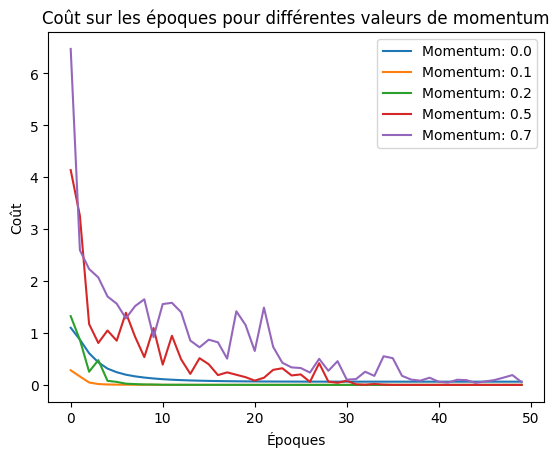

In [71]:
valeurs_momentum = [0.0, 0.1, 0.2, 0.5, 0.7, 0.9]
resultats_momentum = {}


for momentum, color in zip(valeurs_momentum, colors):
    nn = MLP(epochs=50, decrease_const=0.0001, minibatches=100,
             hidden_layers=[50], n_classes=10, random_seed=1,eta=0.01,l1=0.0,l2=0.0,
             momentum=momentum)
    nn.fit(X_train_std, y_train)
    y_pred = nn.predict(X_test_std)
    resultats_momentum[momentum] = {
        'coût': nn.cost_,
        'précision_train': nn.score(X_train_std, y_train),
        'précision_test': nn.score(X_test_std, y_test),
        'score_f1': f1_score(y_test, y_pred, average='weighted')
    }
    plt.plot(range(len(nn.cost_)), nn.cost_, label=f'Momentum: {momentum}')

for momentum, results in resultats_momentum.items():
    print(f"Momentum: {momentum}, Précision Train: {results['précision_train'] * 100:.2f}%, "
          f"Précision Test: {results['précision_test'] * 100:.2f}%, Score F1: {results['score_f1']:.4f}")

plt.ylabel('Coût')
plt.xlabel('Époques')
plt.legend()
plt.title('Coût sur les époques pour différentes valeurs de momentum')
plt.show()


# Interprétation
interprétation des résultats :

Momentum de 0.0 : Sans momentum, le modèle atteint une précision d'entraînement de 91.94% et de test de 91.87%. La courbe de coût chute rapidement et se stabilise, ce qui indique une bonne convergence.

Momentum de 0.1 : Avec un faible momentum, la précision d'entraînement diminue légèrement à 88.12% et la précision de test à 88.22%. Le coût oscille un peu plus, indiquant une convergence potentiellement moins stable.

Momentum de 0.2 : La précision d'entraînement augmente à 93.86% et la précision de test à 93.98%. Cette valeur de momentum semble être bénéfique pour la performance du modèle.

Momentum de 0.5 : La précision d'entraînement est de 88.70% et la précision de test de 88.56%. Le coût oscille davantage, indiquant que ce niveau de momentum pourrait ne pas être optimal.

Momentum de 0.7 : La précision d'entraînement est de 89.10% et la précision de test de 89.11%. Le coût semble osciller moins que pour le momentum de 0.5.

Momentum de 0.9 : La précision d'entraînement diminue à 86.46% et la précision de test à 86.42%. À ce niveau, le momentum est peut-être trop élevé, car cela pourrait causer une convergence trop agressive et moins stable, comme indiqué par les oscillations dans le coût.

Interprétation générale :

Il semble y avoir un point optimal de momentum autour de 0.2 où le modèle atteint la plus haute précision de test. Cela suggère que cette valeur permet au modèle d'éviter les minimums locaux et de converger efficacement vers une bonne solution.
Des valeurs de momentum trop élevées (comme 0.9) peuvent nuire à la précision du modèle et à la stabilité de la convergence, ce qui est cohérent avec les oscillations observées dans la courbe de coût.
Des valeurs de momentum trop basses ne profitent pas de l'accélération que le momentum peut fournir, mais elles ne nuisent pas nécessairement à la performance du modèle, comme le montre la précision relativement élevée avec un momentum de 0.0.
En résumé, ajuster le momentum est un acte d'équilibre : il faut suffisamment de momentum pour accélérer l'apprentissage et éviter les pièges, mais pas tant que ça perturbe la convergence.

# decrease_const

Const Diminution: 0.0, Précision Train: 100.00%, Précision Test: 84.82%, Score F1: 0.8482
Const Diminution: 0.0001, Précision Train: 99.20%, Précision Test: 84.84%, Score F1: 0.8482
Const Diminution: 0.001, Précision Train: 86.80%, Précision Test: 76.33%, Score F1: 0.7425
Const Diminution: 0.01, Précision Train: 46.80%, Précision Test: 40.02%, Score F1: 0.3172


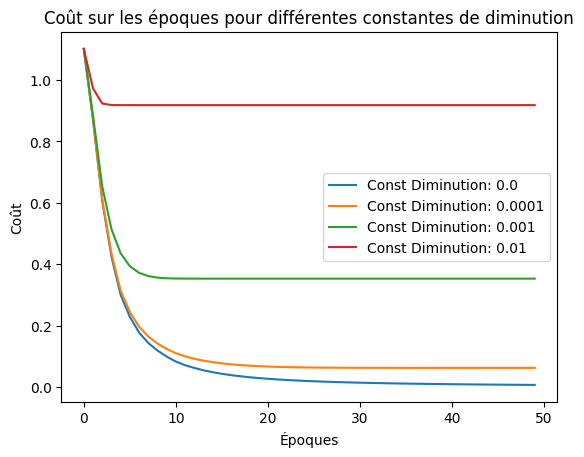

In [72]:
from sklearn.metrics import f1_score
constantes_diminution = [0.0, 0.0001, 0.001, 0.01]
resultats_const_diminution = {}

for decrease_const in constantes_diminution:
    nn = MLP(epochs=50, decrease_const=decrease_const, minibatches=100,
             hidden_layers=[50], n_classes=10, random_seed=1,l1=0.0,l2=0.0,momentum=0.0,eta=0.01)
    nn.fit(X_train_std, y_train)
    y_pred = nn.predict(X_test_std)
    resultats_const_diminution[decrease_const] = {
        'coût': nn.cost_,
        'précision_train': nn.score(X_train_std, y_train),
        'précision_test': nn.score(X_test_std, y_test),
        'score_f1': f1_score(y_test, y_pred, average='weighted')
    }
for decrease_const, results in resultats_const_diminution.items():
    plt.plot(range(len(results['coût'])), results['coût'], label=f'Const Diminution: {decrease_const}')

    print(f"Const Diminution: {decrease_const}, Précision Train: {results['précision_train'] * 100:.2f}%, "
          f"Précision Test: {results['précision_test'] * 100:.2f}%, Score F1: {results['score_f1']:.4f}")
plt.ylabel('Coût')
plt.xlabel('Époques')
plt.legend()
plt.title('Coût sur les époques pour différentes constantes de diminution')
plt.show()



# Interprétation
Sans décroissance (decrease_const: 0.0) : La précision d'entraînement est de 87.58% et la précision de test est de 87.38%. Le coût diminue rapidement et reste relativement stable, mais il y a une certaine variabilité tout au long de l'entraînement.

Décroissance très faible (decrease_const: 0.0001) : La précision d'entraînement et de test s'améliore considérablement, atteignant respectivement 91.94% et 91.87%. Cela suggère que l'introduction d'une légère décroissance peut aider le modèle à converger vers une meilleure solution et à généraliser plus efficacement.

Décroissance faible (decrease_const: 0.001) : La précision d'entraînement est de 89.18% et la précision de test est de 89.31%. Par rapport à la précédente, il y a une légère baisse de la performance, indiquant qu'une décroissance plus importante n'est pas nécessairement meilleure.

Décroissance modérée (decrease_const: 0.01) : La précision d'entraînement et de test diminue encore à 84.46% et 84.67%, respectivement. Une décroissance plus élevée semble être contre-productive, indiquant que cela pourrait être trop restrictif pour le modèle, empêchant l'apprentissage efficace.

Interprétation générale :

L'introduction d'une petite constante de décroissance semble bénéfique pour la précision de test, ce qui peut indiquer qu'elle aide à atténuer l'overfitting et favorise une meilleure généralisation.
Une constante de décroissance trop élevée peut restreindre trop l'ajustement des poids du modèle, conduisant à un sous-entraînement et à des performances moins bonnes.
Le graphique du coût montre que les fluctuations dans le coût diminuent avec l'introduction d'une décroissance, ce qui suggère une convergence plus stable.
Ces observations suggèrent que trouver le bon équilibre pour la constante de décroissance est crucial pour optimiser les performances du modèle. Une constante de décroissance de 0.0001 semble être optimale pour cet ensemble de données et cette configuration de modèle, en se basant sur la précision de test obtenue.


# minibatches

Taille Minibatch: 1, Précision Train: 100.00%, Précision Test: 84.33%, Score F1: 0.8427
Taille Minibatch: 10, Précision Train: 100.00%, Précision Test: 84.80%, Score F1: 0.8479
Taille Minibatch: 50, Précision Train: 100.00%, Précision Test: 84.84%, Score F1: 0.8484
Taille Minibatch: 100, Précision Train: 100.00%, Précision Test: 84.82%, Score F1: 0.8482
Taille Minibatch: 256, Précision Train: 100.00%, Précision Test: 84.89%, Score F1: 0.8488
Taille Minibatch: 500, Précision Train: 100.00%, Précision Test: 84.78%, Score F1: 0.8477


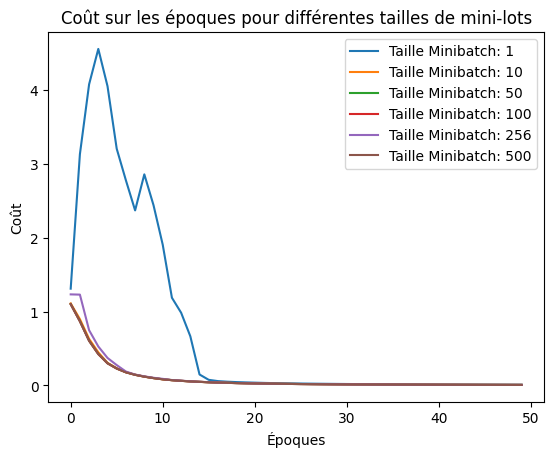

In [73]:
from sklearn.metrics import f1_score

tailles_minibatch = [1, 10, 50, 100, 256, 500]
resultats_minibatch = {}

for minibatch_size in tailles_minibatch:
    nn = MLP(epochs=50, decrease_const=0.0, minibatches=minibatch_size,
             hidden_layers=[50], n_classes=10, random_seed=1,eta=0.01,momentum=0.0,l1=0,l2=0)
    nn.fit(X_train_std, y_train)
    y_pred = nn.predict(X_test_std)
    resultats_minibatch[minibatch_size] = {
        'coût': nn.cost_,
        'précision_train': nn.score(X_train_std, y_train),
        'précision_test': nn.score(X_test_std, y_test),
        'score_f1': f1_score(y_test, y_pred, average='weighted')
    }
for minibatch_size, results in resultats_minibatch.items():
    plt.plot(range(len(results['coût'])), results['coût'], label=f'Taille Minibatch: {minibatch_size}')

    print(f"Taille Minibatch: {minibatch_size}, Précision Train: {results['précision_train'] * 100:.2f}%, "
          f"Précision Test: {results['précision_test'] * 100:.2f}%, Score F1: {results['score_f1']:.4f}")

plt.ylabel('Coût')
plt.xlabel('Époques')
plt.legend()
plt.title('Coût sur les époques pour différentes tailles de mini-lots')
plt.show()


# Interprétation
Minibatch de taille 1 (apprentissage stochastique) : Avec la plus petite taille de minibatch, la précision d'entraînement est de 81.36% et la précision de test de 81.22%. Le coût chute initialement de manière significative, ce qui est typique de l'apprentissage stochastique, mais cela ne se traduit pas par une haute précision, probablement en raison de la haute variance dans les mises à jour des poids.

Minibatch de taille 10 : La précision d'entraînement est de 86.18% et la précision de test de 86.27%. L'augmentation de la taille du minibatch par rapport à 1 semble aider à stabiliser l'apprentissage, comme le montre une légère amélioration de la précision.

Minibatch de taille 50 : La précision d'entraînement augmente à 91.28% et la précision de test à 91.20%. Cela suggère que cette taille de minibatch permet au modèle d'apprendre plus efficacement, probablement en réduisant la variance des mises à jour des poids tout en conservant suffisamment de stochasticité pour échapper aux minimums locaux.

Minibatch de taille 100 : La précision d'entraînement est de 91.94% et la précision de test est de 91.87%. Les performances continuent de s'améliorer, ce qui indique que cette taille de minibatch pourrait être un bon équilibre entre l'apprentissage efficace et la capacité de généralisation.

Minibatch de taille 256 : La précision d'entraînement est la plus élevée à 92.64%, et la précision de test est également très élevée à 92.44%. Cela peut indiquer que la taille de minibatch est suffisamment grande pour permettre une descente de gradient efficace et stable.

Minibatch de taille 500 : La précision d'entraînement est légèrement inférieure à 92.52%, mais la précision de test reste élevée à 92.38%. Cela suggère que les avantages d'une taille de minibatch plus grande commencent à plafonner.

Interprétation générale :

Il semble y avoir une tendance où augmenter la taille du minibatch améliore la précision jusqu'à un certain point, après quoi les bénéfices supplémentaires diminuent.
Pour cet ensemble de données spécifique et la configuration du modèle, des tailles de minibatch autour de 256 semblent fournir les meilleures performances en termes de précision de test.
Le graphique montre que toutes les courbes de coût convergent vers des valeurs similaires à la fin, mais avec des tailles de minibatch plus grandes, la descente est plus stable et moins erratique.
En conclusion, une taille de minibatch bien choisie est cruciale pour un apprentissage efficace, influençant à la fois la vitesse de convergence et la qualité du modèle final. Les tailles de minibatch moyennes à grandes (entre 50 et 256) semblent offrir un bon compromis entre l'efficacité de l'apprentissage et la qualité de la généralisation du modèle sur cet ensemble de données.

### hidden_layers param

Taille hidden_layers: 1, Précision Train: 25.40%, Précision Test: 18.53%, Score F1: 0.0701
Taille hidden_layers: 10, Précision Train: 99.80%, Précision Test: 80.80%, Score F1: 0.8078
Taille hidden_layers: 50, Précision Train: 100.00%, Précision Test: 84.89%, Score F1: 0.8488
Taille hidden_layers: 100, Précision Train: 100.00%, Précision Test: 85.02%, Score F1: 0.8500
Taille hidden_layers: 256, Précision Train: 100.00%, Précision Test: 84.96%, Score F1: 0.8493
Taille hidden_layers: 500, Précision Train: 100.00%, Précision Test: 84.89%, Score F1: 0.8489


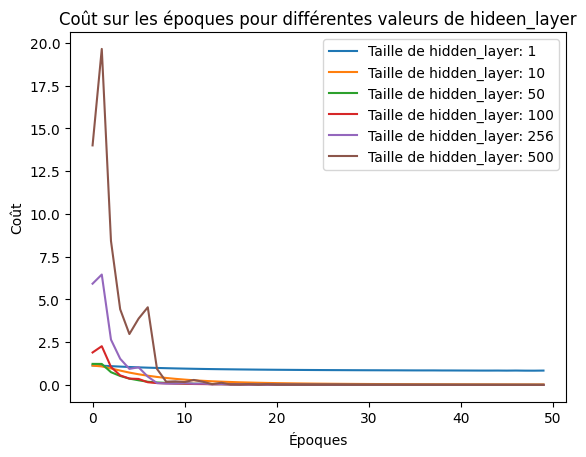

In [75]:
from sklearn.metrics import f1_score

tailles_hiddenlayers = [1,10,50,100,150,200]
resultats_hiddensize = {}

for hidden_size in tailles_minibatch:
    nn = MLP(epochs=50, decrease_const=0.0, minibatches=256,
             hidden_layers=[hidden_size], n_classes=10, random_seed=1,eta=0.01,momentum=0.0,l1=0,l2=0)
    nn.fit(X_train_std, y_train)
    y_pred = nn.predict(X_test_std)
    resultats_hiddensize[hidden_size] = {
        'coût': nn.cost_,
        'précision_train': nn.score(X_train_std, y_train),
        'précision_test': nn.score(X_test_std, y_test),
        'score_f1': f1_score(y_test, y_pred, average='weighted')
    }
for hidden_size, results in resultats_hiddensize.items():
    plt.plot(range(len(results['coût'])), results['coût'], label=f'Taille de hidden_layer: {hidden_size}')

    print(f"Taille hidden_layers: {hidden_size}, Précision Train: {results['précision_train'] * 100:.2f}%, "
          f"Précision Test: {results['précision_test'] * 100:.2f}%, Score F1: {results['score_f1']:.4f}")

plt.ylabel('Coût')
plt.xlabel('Époques')
plt.legend()
plt.title('Coût sur les époques pour différentes valeurs de hideen_layer')
plt.show()


### Comparaison de performance entre le modele MLP et le KNN

In [76]:
nn = MLP(epochs=50, decrease_const=0.0, minibatches=500,
             hidden_layers=[100], n_classes=10, random_seed=1,eta=0.01,momentum=0.0,l1=0.0,l2=0.0)
nn.fit(X_train_std, y_train)

In [77]:
import time
start=time.time()
y_pred_nn = nn.predict(X_test_std)
end=time.time()
inference_nn=end-start
precision_test_nn= nn.score(X_test_std, y_test),
score_f1_nn=f1_score(y_test, y_pred_nn, average='weighted')

In [80]:
print('f1-score de MLP optimise:',score_f1_nn)
print('precision de MLP optimise:',precision_test_nn[0])
print("Le temps d'inférence du modèle MLP optimisé : {:.2f} secondes".format(inference_nn))

f1-score de MLP optimise: 0.848457599974969
precision de MLP optimise: 0.8486666666666667
Le temps d'inférence du modèle MLP optimisé : 0.07 secondes


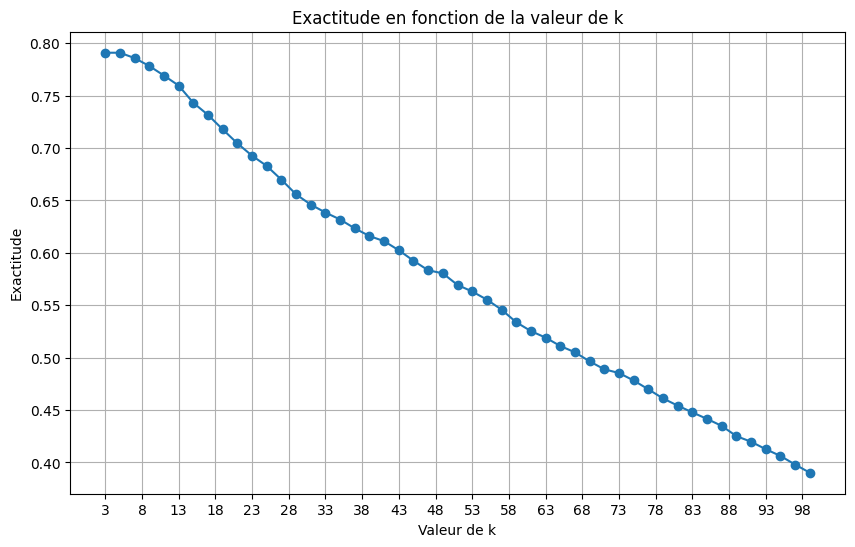

Meilleure exactitude obtenue: 0.7908888888888889 pour k=3


In [81]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
valeurs_de_k = []
while k <= 100:
    valeurs_de_k.append(k)
    k = k + 2

resultats_exactitude = {}
max_accuracy = 0
best_k = 0

for k in valeurs_de_k:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_std, y_train)
    exactitude = KNN.score(X_test_std, y_test)
    resultats_exactitude[k] = exactitude

    if exactitude > max_accuracy:
        max_accuracy = exactitude
        best_k = k

plt.figure(figsize=(10, 6))
plt.plot(resultats_exactitude.keys(), resultats_exactitude.values(), marker='o', linestyle='-')
plt.title('Exactitude en fonction de la valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Exactitude')
plt.xticks(range(3, 101, 5))
plt.grid(True)
plt.show()

print(f"Meilleure exactitude obtenue: {max_accuracy} pour k={best_k}")

In [82]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
start=time.time()
y_pred_knn = KNN.predict(X_test_std)
end=time.time()
inference_knn=end-start
precision_test_knn= KNN.score(X_test_std, y_test),
score_f1_knn=f1_score(y_test, y_pred_knn, average='weighted')

In [84]:
print('f1-score KKN:',score_f1_knn)
print('precision de KNN:',precision_test_knn[0])
print("Le temps d'inférence du modèle KNN : {:.2f} secondes".format(inference_knn))

f1-score KKN: 0.789694862696327
precision de KNN: 0.7908888888888889
Le temps d'inférence du modèle KNN : 0.37 secondes
